## LING 521: Applied English Grammar
### Text Analysis Script #1 
TODO: write up an intro

### 1. Load Dependencies
Import the required packages (install them if you haven't already)

In [1]:
import sys
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
#%matplotlib inline
%matplotlib notebook

Verify software dependencies loaded: 

In [2]:
print(sys.version)
print("My library versions:")
print(f"matplotlib: {matplotlib.__version__}")
print(f"ntlk: {nltk.__version__}")
print(f"Numpy: {np.__version__}")

#print(f"Pandas: {pd.__version__}")
#print(f"Scipy: {sp.__version__}")
#print(f"nose: {nose.__version__}")

3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)]
My library versions:
matplotlib: 3.1.1
ntlk: 3.4.5
Numpy: 1.17.3


### 2. Load Natural Language Processing Tool Kit (NLTK) Package
NLTK POS Taggers:

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('tagsets')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. Load Corpora:

In [4]:
# tagset_upenn = nltk.help.upenn_tagset()
from nltk.corpus import stopwords

aux_verbs = ['be', 'am', 'are', 'is', 'was', 'were', 'being', 'been',
             'can', 'could', 'dare',
             'do', 'does', 'did',
             'have', 'has', 'had', 'having',
             'may', 'might', 'must', 'need', 'ought', 'shall', 'should', 'will', 'would']
coordinators = ['and', 'or', 'but', 'nor']

adverbs = ['then', 'why']

messages = ['Gym?',
            'yeah be there in about a half',
            'Ok see you when you get here!',
            'Seconds away',
            'Meet me between smith and cramer asap',
            'I got you and Taylor tix in pit section.',
            'Get some milk please',
            'Chk email',
            'Made it',
            'Do u know where u saved that movie on my compute',
            'Im meeting some dude from the internet for happy hour ahh!',
            'Wed is dinner for renetta call us soon',
            'where r u???',
            'pinball']

stops = set(stopwords.words("english"))

### 4. Tag POS in 2007 Text Messages:
Iterate thru each sentence and calculate subtotals:

In [5]:
counter_list = []
for msg in messages:
    tokens = nltk.word_tokenize(msg)
    #print(tokens)
    pos = nltk.pos_tag(tokens, tagset='universal')
    print(f"\nmessage: {pos}")


    lstops = [x.lower() for x in stops]
    function_words = [word for word in tokens if word in lstops]
    fw_count = len(function_words)
    print(f"Function Words: {fw_count}")

    count = Counter([j for i,j in pos])
    counter_list.append(count)
    print(f"count: {count}")


message: [('Gym', 'NOUN'), ('?', '.')]
Function Words: 0
count: Counter({'NOUN': 1, '.': 1})

message: [('yeah', 'ADV'), ('be', 'VERB'), ('there', 'ADV'), ('in', 'ADP'), ('about', 'ADP'), ('a', 'DET'), ('half', 'NOUN')]
Function Words: 5
count: Counter({'ADV': 2, 'ADP': 2, 'VERB': 1, 'DET': 1, 'NOUN': 1})

message: [('Ok', 'NOUN'), ('see', 'VERB'), ('you', 'PRON'), ('when', 'ADV'), ('you', 'PRON'), ('get', 'VERB'), ('here', 'ADV'), ('!', '.')]
Function Words: 4
count: Counter({'VERB': 2, 'PRON': 2, 'ADV': 2, 'NOUN': 1, '.': 1})

message: [('Seconds', 'VERB'), ('away', 'ADV')]
Function Words: 0
count: Counter({'VERB': 1, 'ADV': 1})

message: [('Meet', 'VERB'), ('me', 'PRON'), ('between', 'ADP'), ('smith', 'NOUN'), ('and', 'CONJ'), ('cramer', 'NOUN'), ('asap', 'NOUN')]
Function Words: 3
count: Counter({'NOUN': 3, 'VERB': 1, 'PRON': 1, 'ADP': 1, 'CONJ': 1})

message: [('I', 'PRON'), ('got', 'VERB'), ('you', 'PRON'), ('and', 'CONJ'), ('Taylor', 'NOUN'), ('tix', 'NOUN'), ('in', 'ADP'), ('p

#### Sum of totals:

In [6]:
counter_pos = sum(counter_list, Counter())
print(f"\nCounts: {counter_pos}")


Counts: Counter({'NOUN': 29, 'VERB': 12, 'ADP': 9, 'ADV': 8, 'PRON': 8, '.': 7, 'DET': 4, 'ADJ': 3, 'CONJ': 2})


### 5.  Plot Stacked Bar Chart
Test Graph:

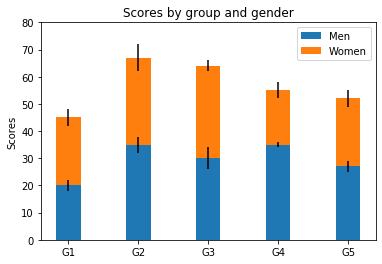

In [7]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.show()

### 6.  Summary
Summary Write-up

##### Footer: used to force updates
Last Updated: 11/7/2019 1:02 PM 